
Summary statistics:

       mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000            

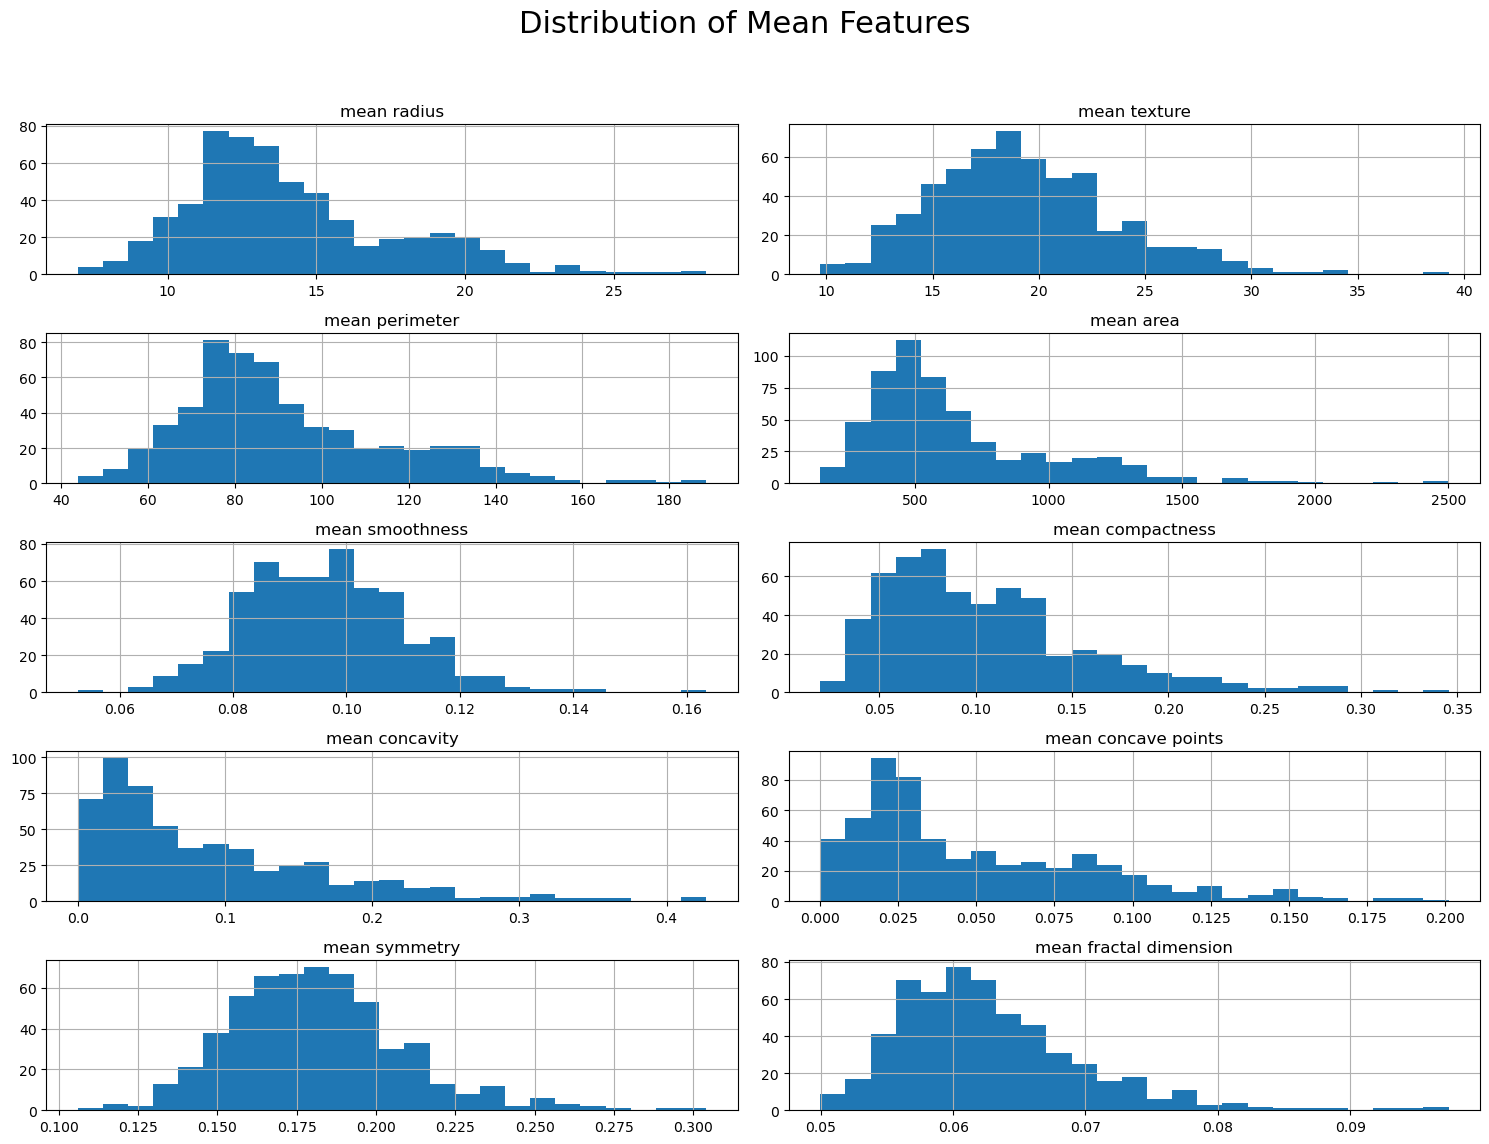

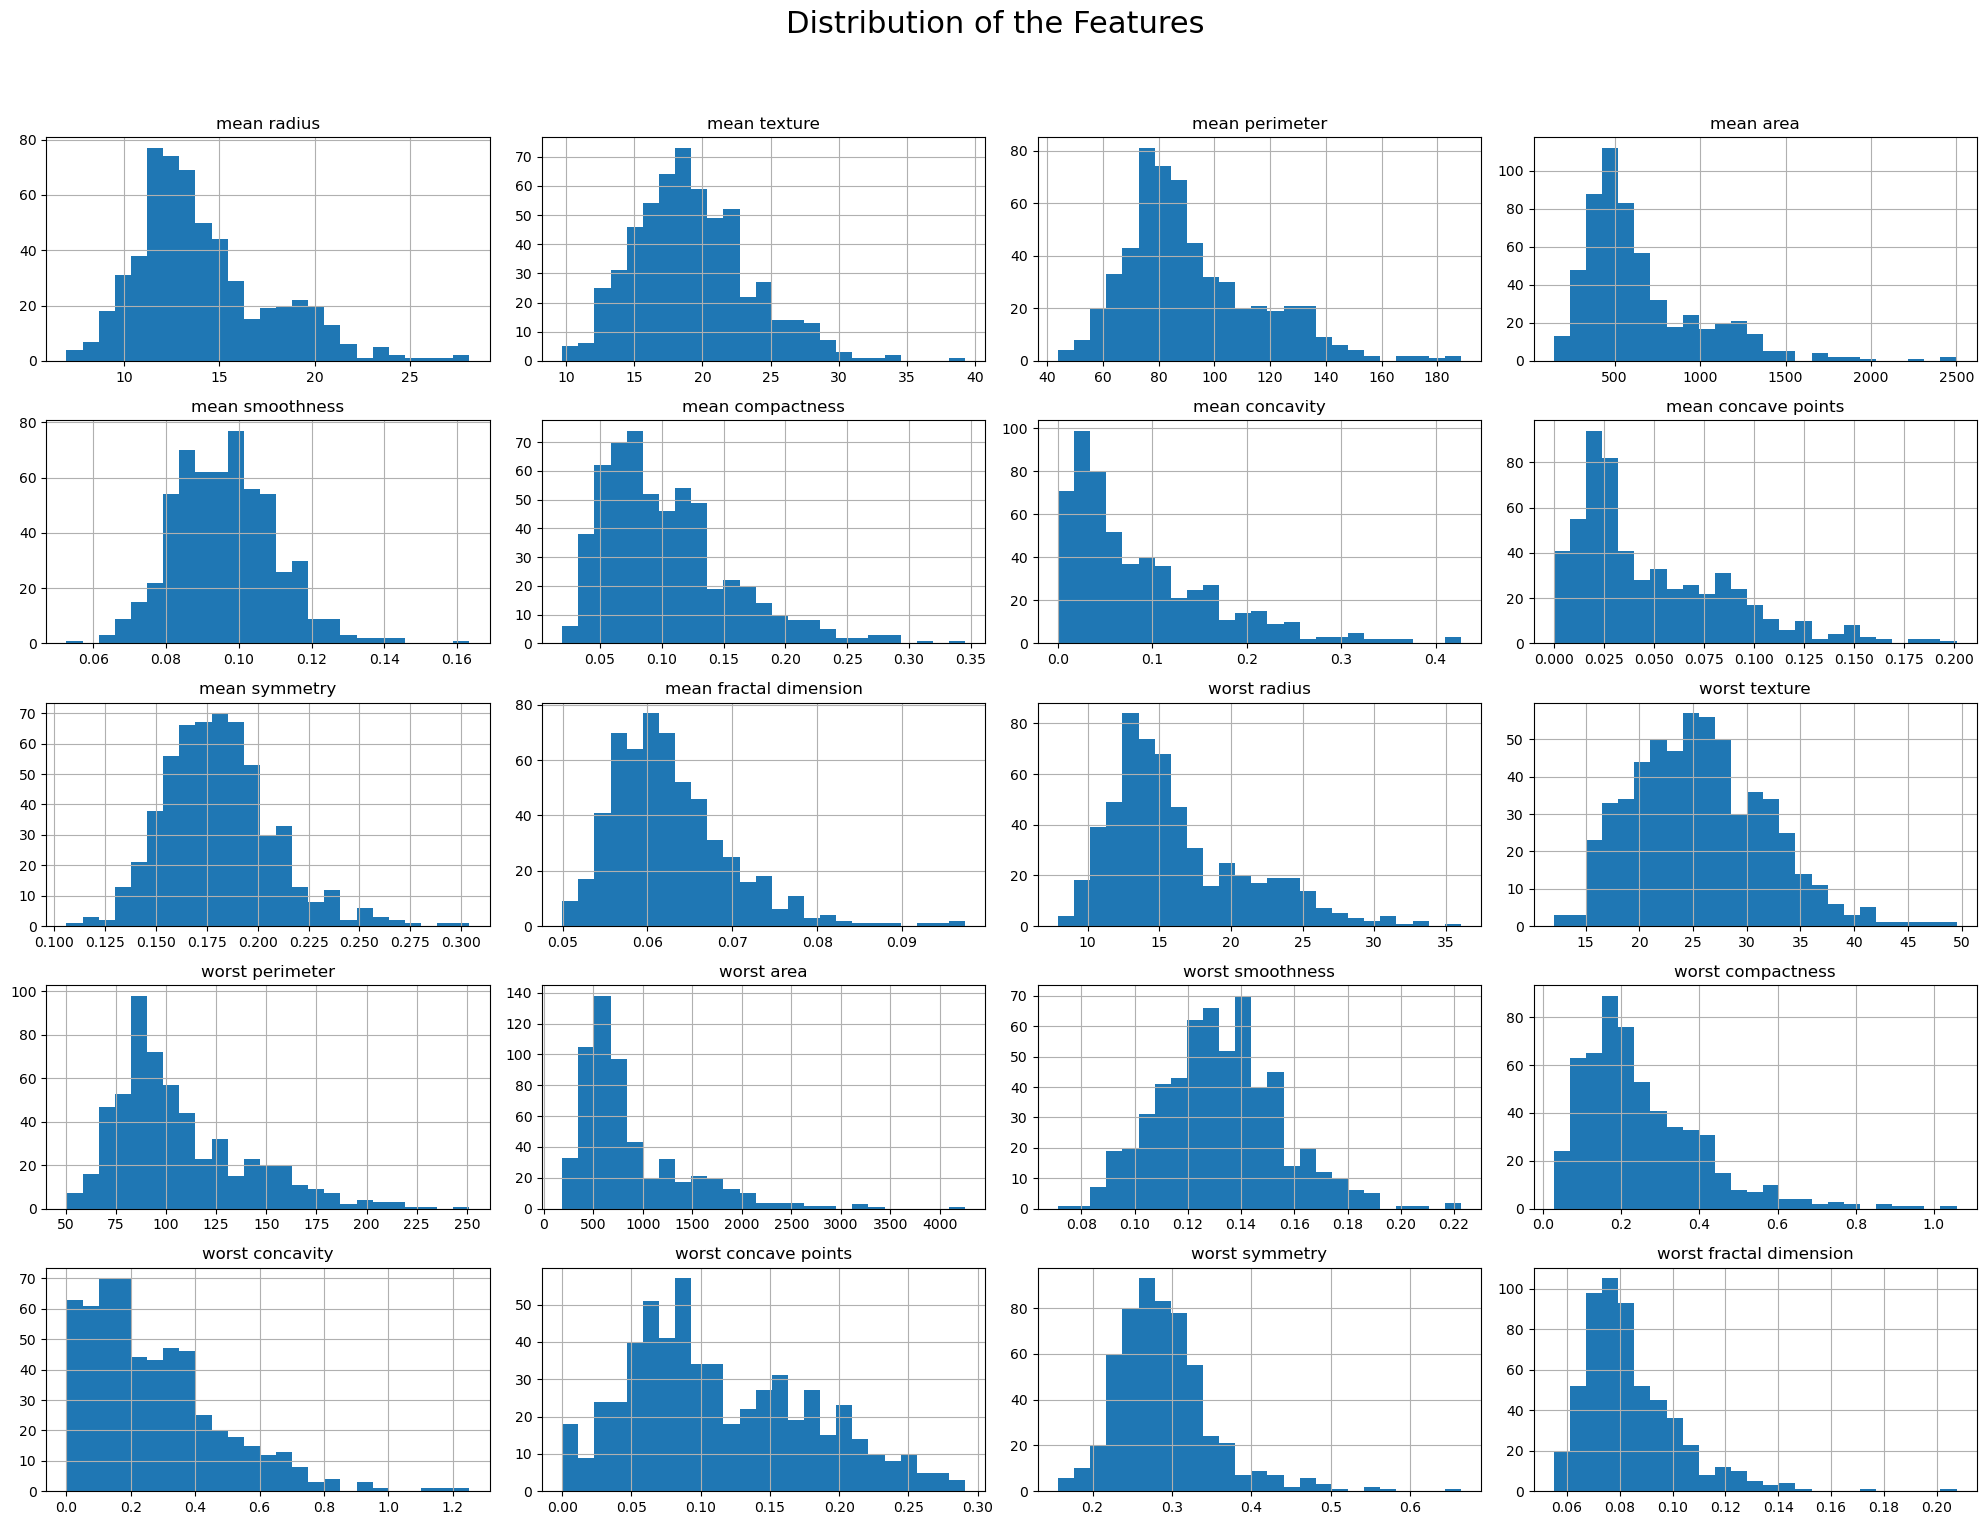

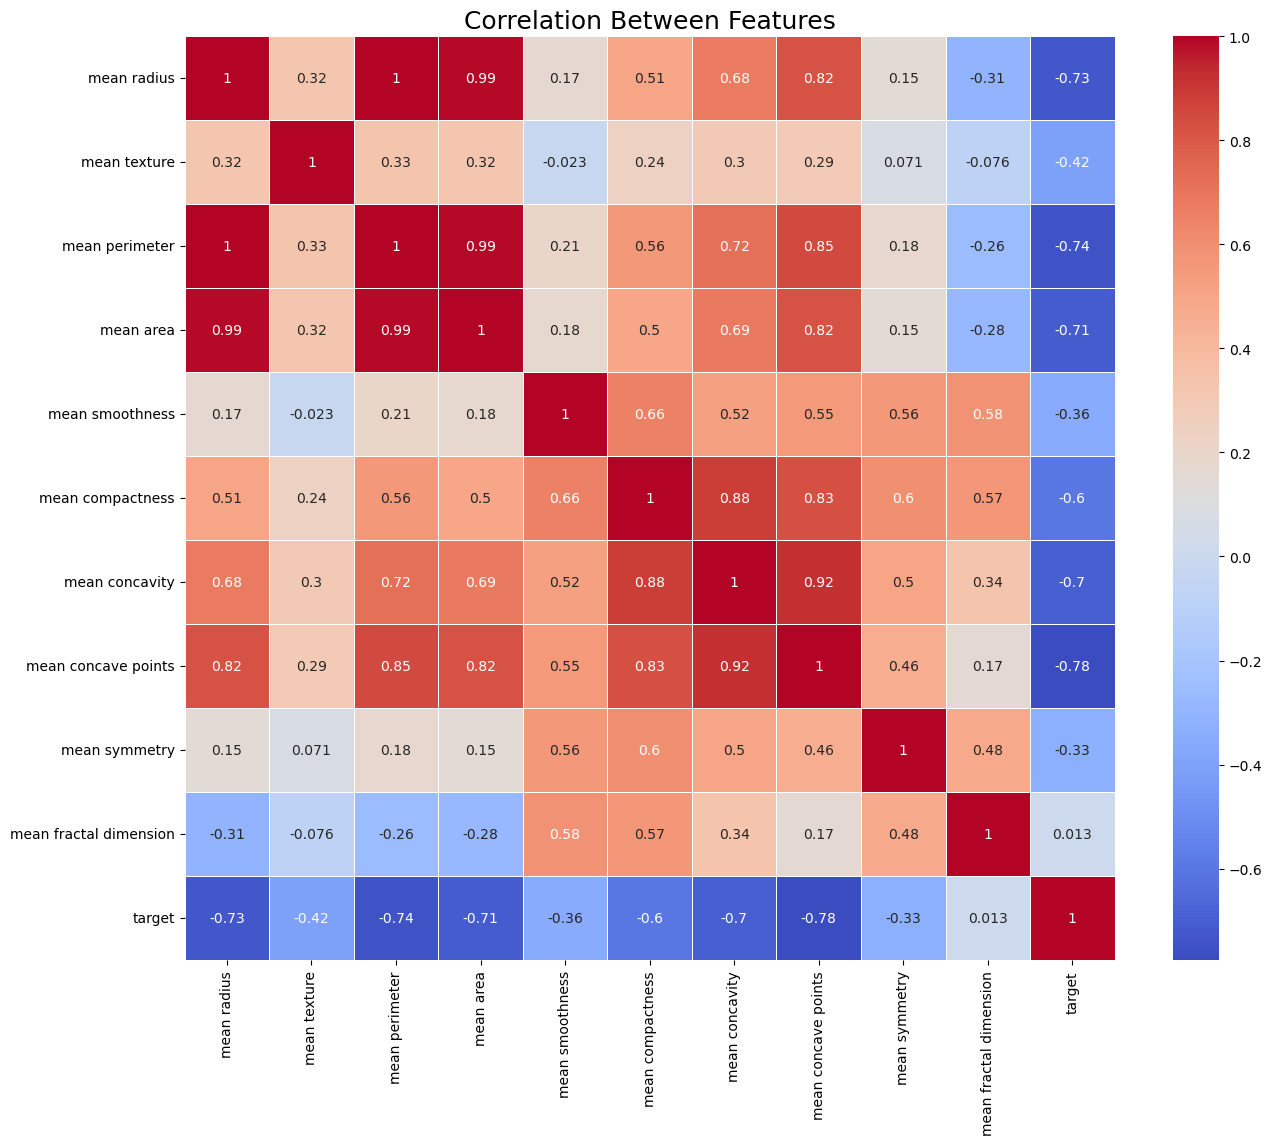

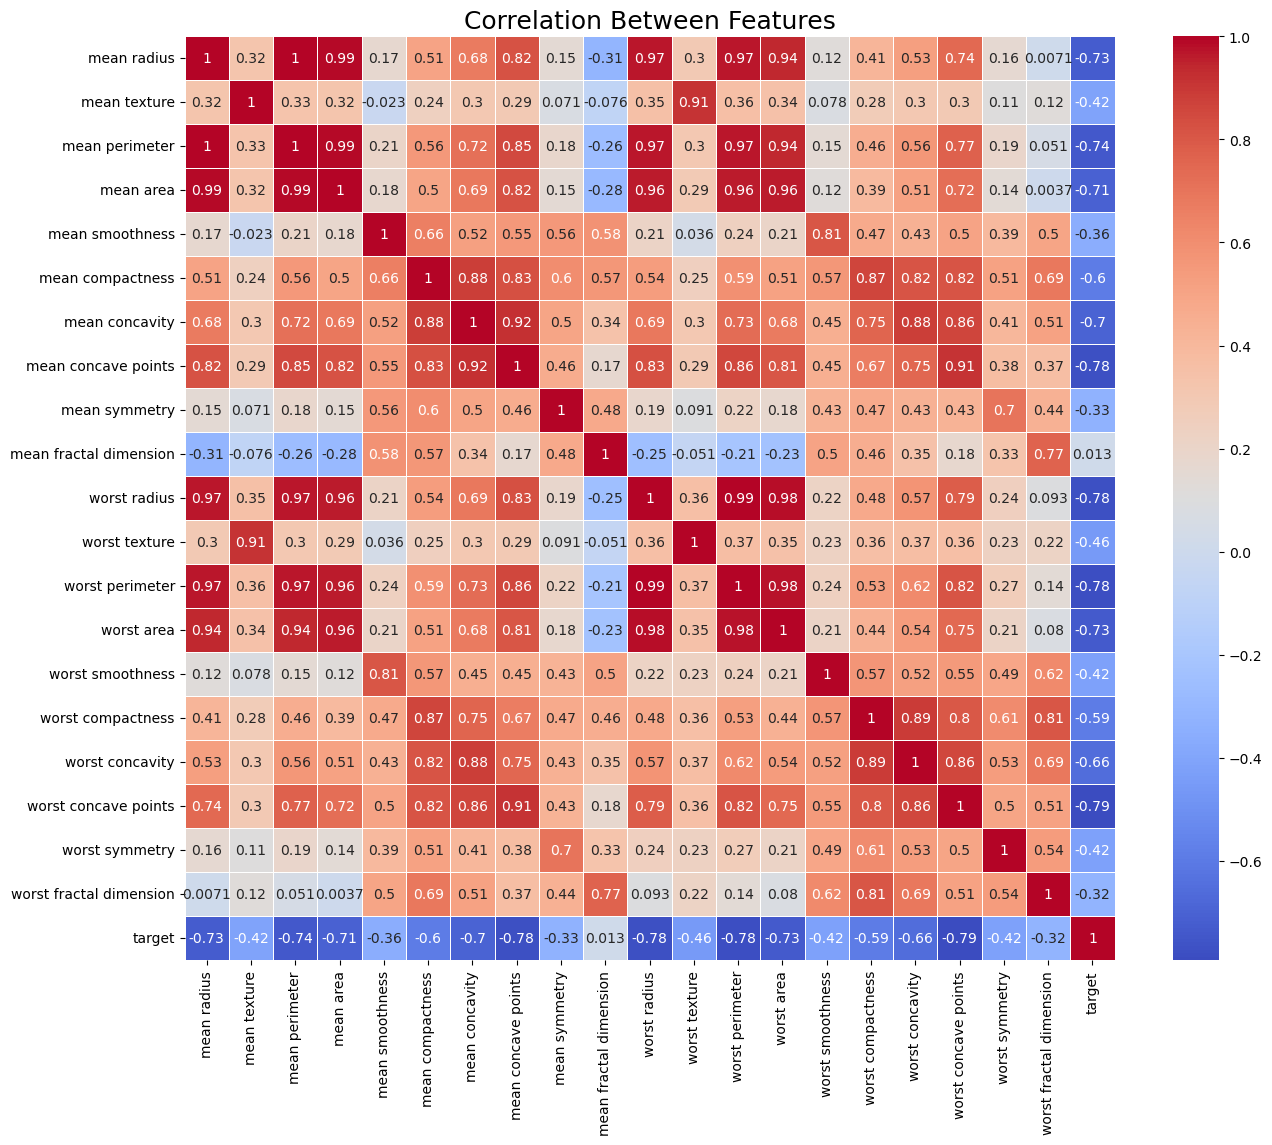

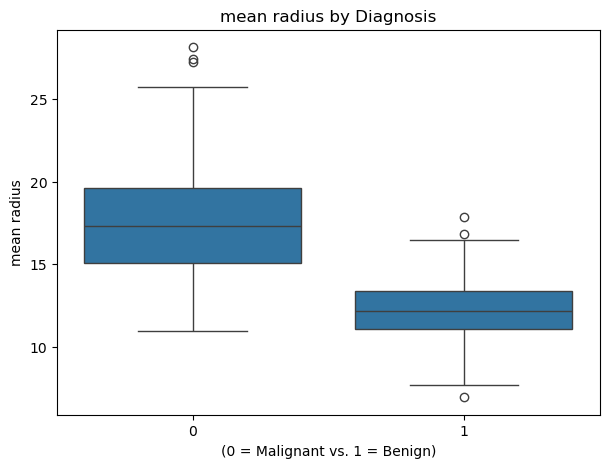

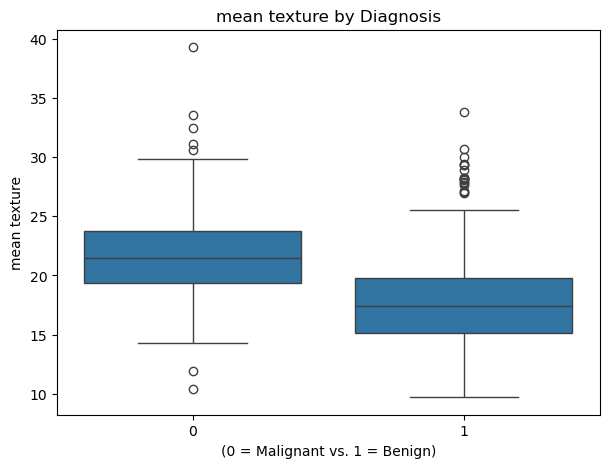

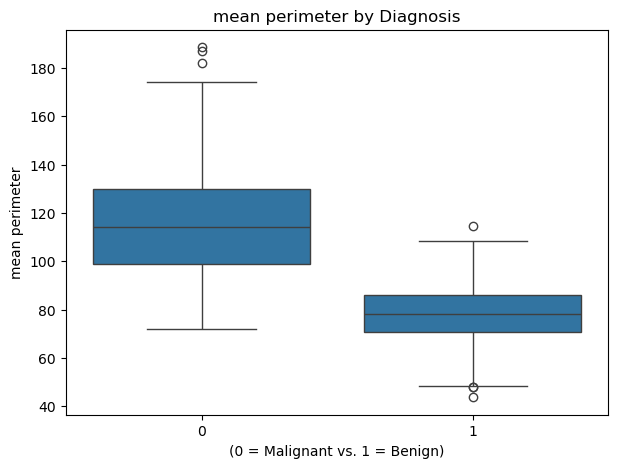

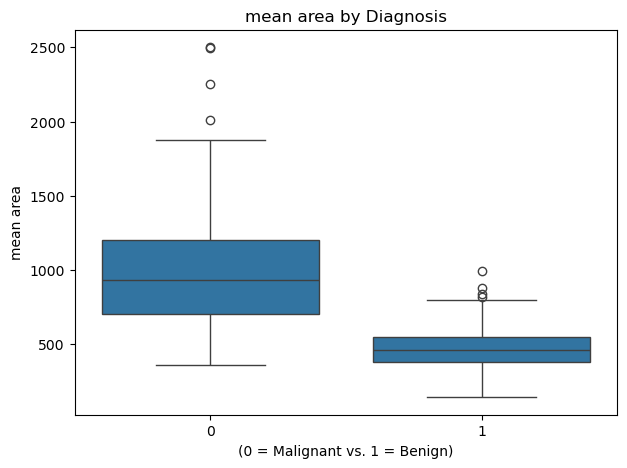

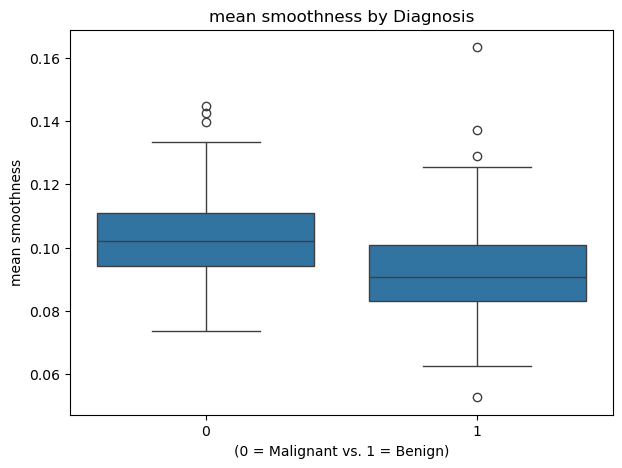

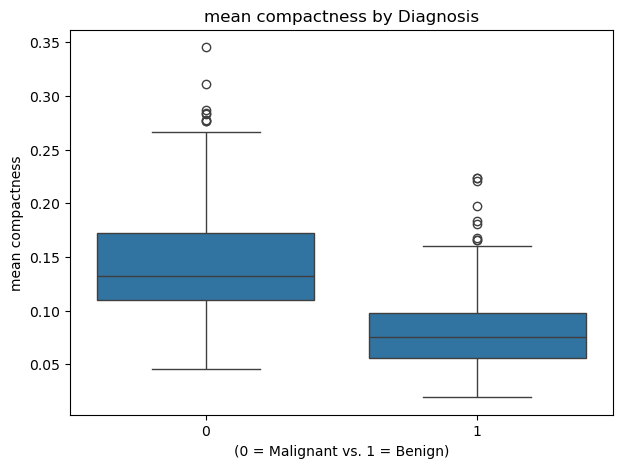

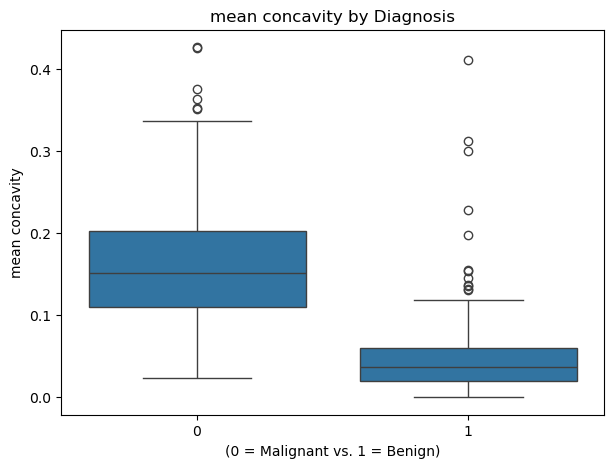

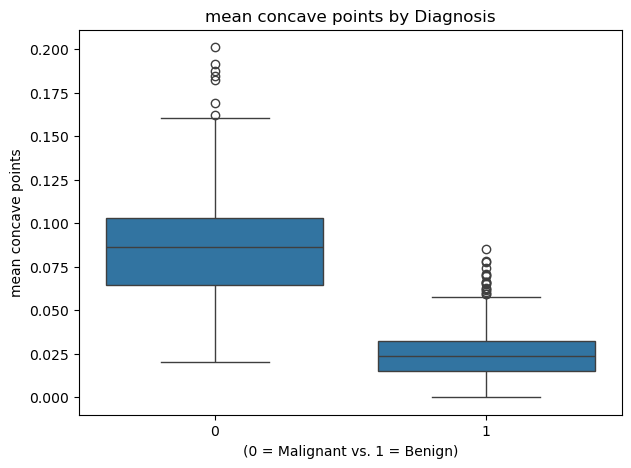

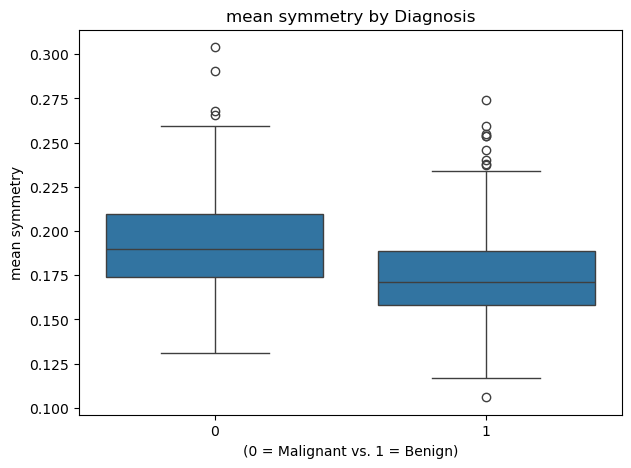

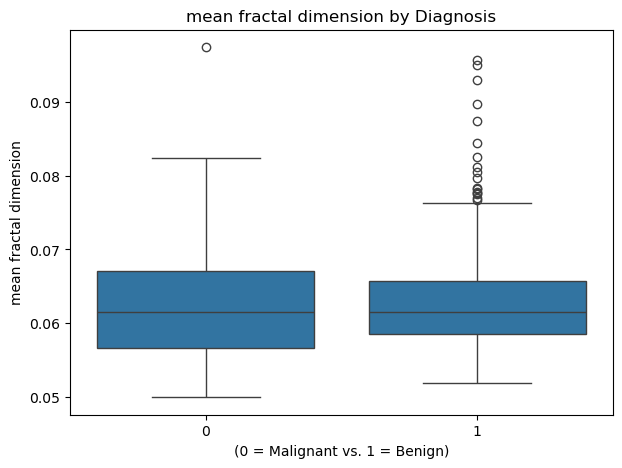

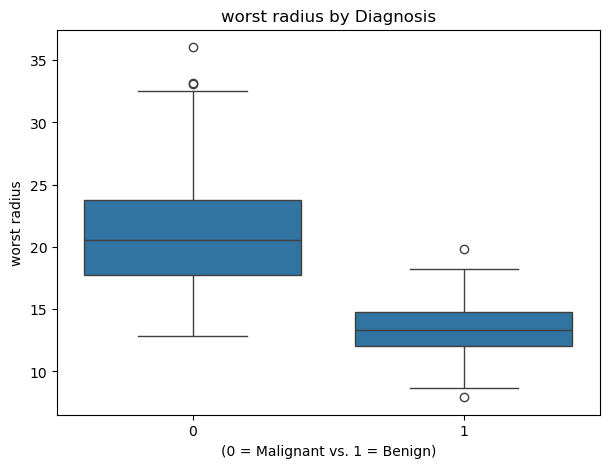

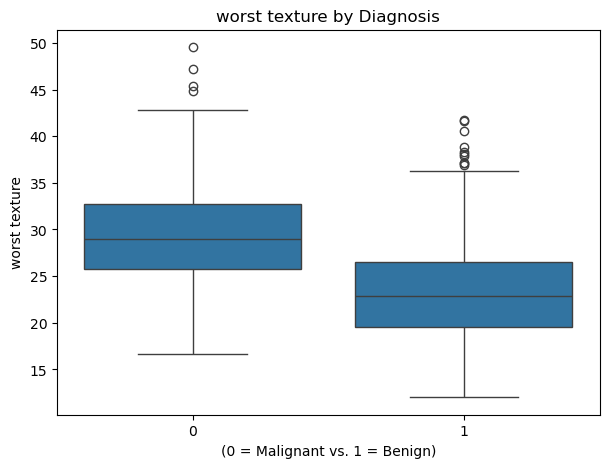

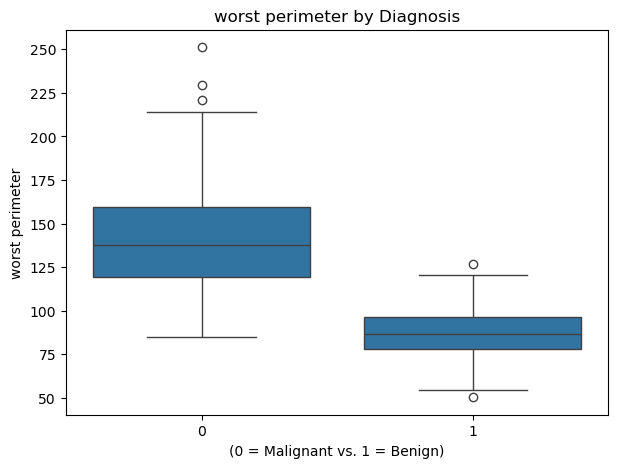

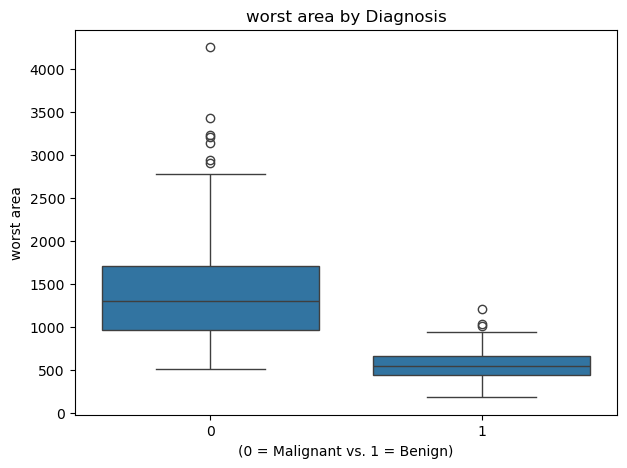

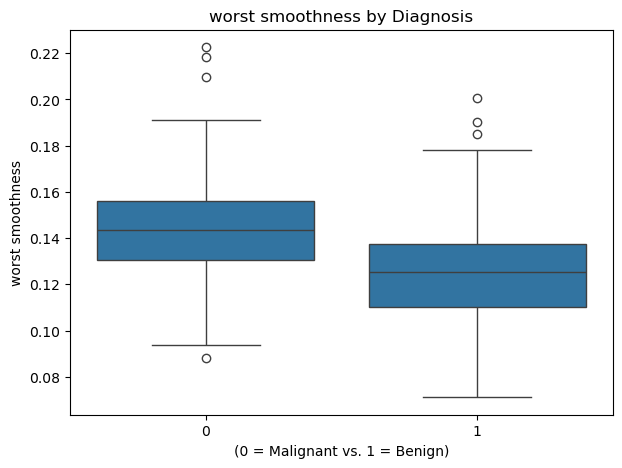

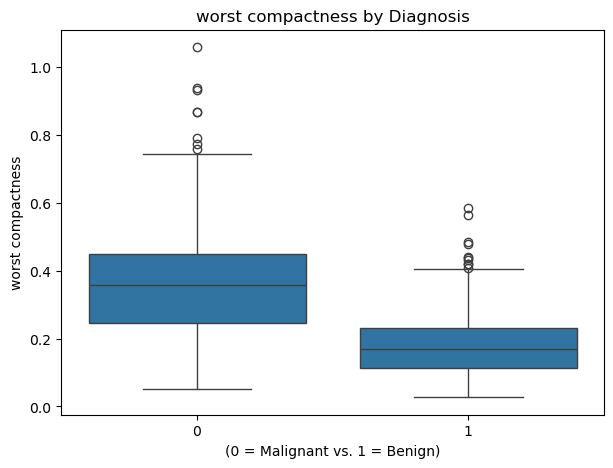

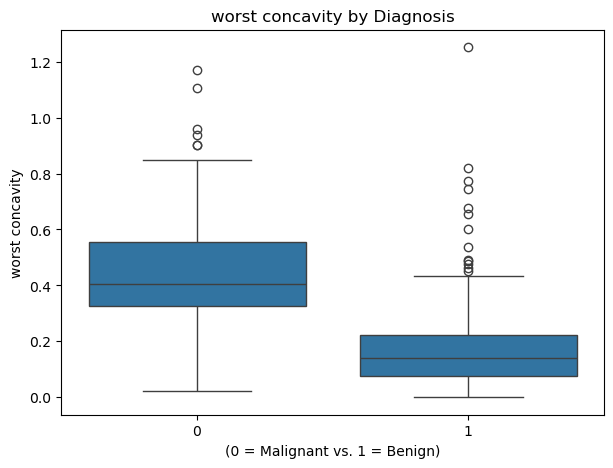

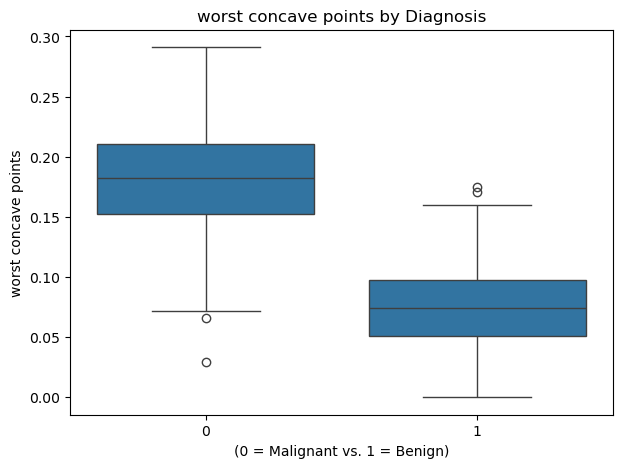

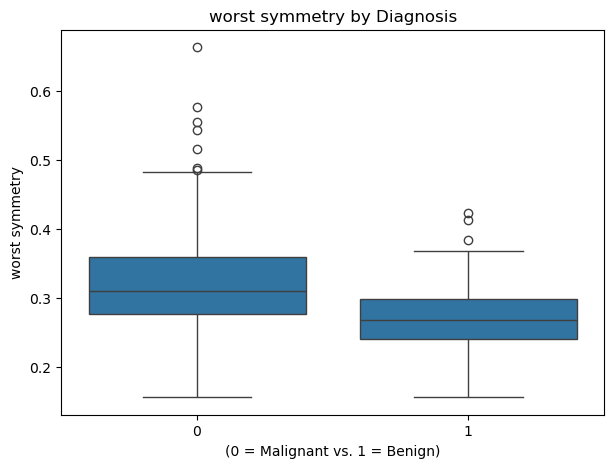

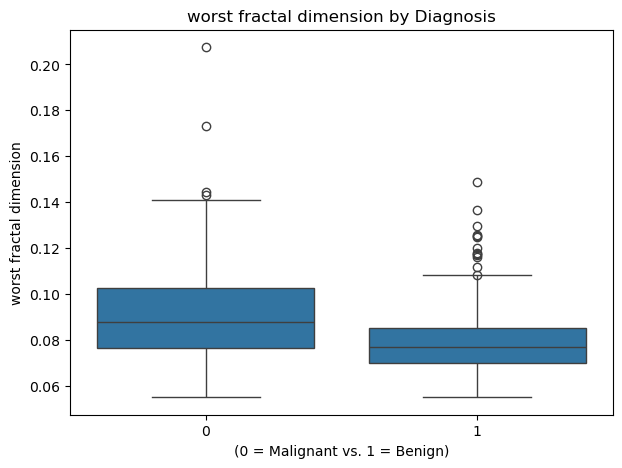

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA

# Load the breast cancer dataset
cancer = load_breast_cancer()
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['target'] = cancer.target

# Summary statistics
print("\nSummary statistics:\n")
print(df.describe())

# Visualization of Feature Distribution
mean_features = [col for col in df.columns if col.startswith('mean ')]

worst_features = [col for col in df.columns if col.startswith('worst ')]
combined_features = mean_features + worst_features
df[combined_features].hist(bins=25, figsize=(20, 16), layout=(5, 4))
plt.suptitle('Distribution of the Features', fontsize=22)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

'''
# Correlation Heatmap
mean_features_only = [col for col in df.columns if col.startswith('mean ')]
mean_features = mean_features_only + ['target']
combined_features_with_target = combined_features + ['target']
'''

# just Mean Heatmap
plt.figure(figsize=(15,12))
mean_corr_matrix = df[mean_features].corr()
sns.heatmap(mean_corr_matrix, cmap='coolwarm', linewidths=0.5, annot=True)
plt.title('Correlation Between Features', fontsize=18)
plt.show()

# Both Mean and Worst Heatmap
plt.figure(figsize=(15,12))
combined_corr_matrix = df[combined_features_with_target].corr()
sns.heatmap(combined_corr_matrix, cmap='coolwarm', linewidths=0.5, annot=True)
plt.title('Correlation Between Features', fontsize=18)
plt.show()

# Differences in Data Between Benign and Malignant Cases
for feature in combined_features:
    plt.figure(figsize=(7,5))
    sns.boxplot(data=df, x='target', y=feature)
    plt.title(f'{feature} by Diagnosis')
    plt.xlabel('(0 = Malignant vs. 1 = Benign)')
    plt.ylabel(feature)
    plt.show()